## Project: Zomato API

## Question-1

## 1.1

Delhi-NCR 7922
Rest Of India 730


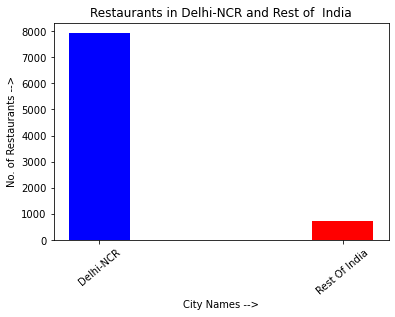

In [1]:
import pandas as pd #importing required libraries
import matplotlib.pyplot as plt 
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1] # Making country as India acc to question
# Distinguishing cities into Delhi-NCR (acc to ques) and Rest of India 
def fun(s): 
    if s=='New Delhi' or s=='Gaziabad' or s=='Noida' or s=='Faridabad' or s=='Gurgaon':
        s='Delhi-NCR'
        return s
    else:
        s='Rest Of India'
        return s

data['City']=data['City'].apply(fun)
x=data['City'].value_counts() # Calculating total number of Restuarants in the cities
location=x.index # Cities
number=x.values  # Number of restaurants
# plotting the bar graph
print(location[0],number[0])
print(location[1],number[1])
plt.bar(location,number,color=['blue','red'],width=[.25,.25])
plt.xlabel("City Names -->")
plt.ylabel("No. of Restaurants -->")
plt.title("Restaurants in Delhi-NCR and Rest of  India")
plt.xticks(rotation=40)
plt.show()

## 1.2

In [2]:
import pandas as pd # Importing required libraries
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
data=data.loc[data.Cuisines.notnull()] # Removing all the null data
# Distinguishing cities into Delhi-NCR (acc to ques) and Rest of India 
def fun(s):
    if s=='New Delhi' or s=='Gaziabad' or s=='Noida' or s=='Faridabad' or s=='Gurgaon':
        s='Delhi-NCR'
        return s
    else:
        s='Rest Of India'
        return s
data['City']=data['City'].apply(fun)
ncr_cuisines=list(data[data.City=='Delhi-NCR']['Cuisines']) # Making list of cuisines present in Delhi-NCR
NCR_Cuisines=[]
for ele in ncr_cuisines:
    li=[x.strip() for x in ele.split(',')] # Taking each cuisine separately and appending into the list
    for i in li:
        NCR_Cuisines.append(i)
NCR_Cuisines=list(set(NCR_Cuisines))
rest_cuisines=list(data[data.City=='Rest Of India']['Cuisines']) # Similarly making list of cuisines present in Rest of India
Rest_Cuisines=[]
for ele in rest_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for y in li:
        Rest_Cuisines.append(y)
Rest_Cuisines=list(set(Rest_Cuisines))     
Required_Cuisines=[]
# Iterating through loop in Rest_Cuisines and NCR Cuisines to get the required cuisines
for i in Rest_Cuisines: 
    if i not in NCR_Cuisines:
        Required_Cuisines.append(i)
print("The cuisines which are not present in restaurant of Delhi-NCR but present in Rest of India:")
for ele in Required_Cuisines:
    print(ele)

The cuisines which are not present in restaurant of Delhi-NCR but present in Rest of India:
Malwani
German
BBQ
Cajun


## 1.2 Using API

In [3]:
import requests
import json
header={'Accept':'application/json','user-key':'68a952b60155797d28def1585d888b9f'}
response=requests.get('https://api.zomato.com/v2.1/cities',params={'q':'delhi'},headers=header)
response=response.json()
city_id=response['location_suggestions'][0]['id']
response=requests.get('https://api.zomato.com/v2.1/cuisines',params={'city_id':1},headers=header)
response=response.json()
li=[]
for i in range(len(response['cuisines'])):
    li.append(response['cuisines'][i]['cuisine']['cuisine_name'])
li=set(li)
l=set(Rest_Cuisines).difference(li)
print('Cuisines which are in Rest Of India through zomato api but not present in Delhi-NCR by dataset are')
for ele in list(l):
    print(ele)

Cuisines which are in Rest Of India through zomato api but not present in Delhi-NCR by dataset are
Indian
Cajun
Charcoal Grill
German
Armenian
Malwani


## 1.3

Top 10 Cuisines of Delhi-NCR-
North Indian 3587
Chinese 2442
Fast Food 1858
Mughlai 931
Bakery 695
South Indian 566
Continental 546
Desserts 539
Street Food 537
Italian 535


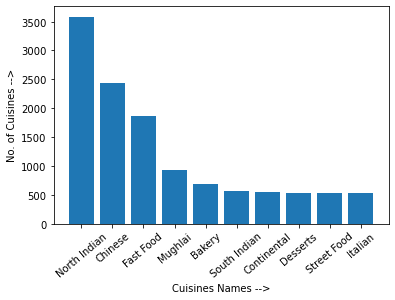

Top 10 Cuisines of Rest Of India-
North Indian 359
Chinese 248
Continental 178
Italian 147
Cafe 140
Fast Food 105
South Indian 65
Mughlai 61
Desserts 58
Mexican 50


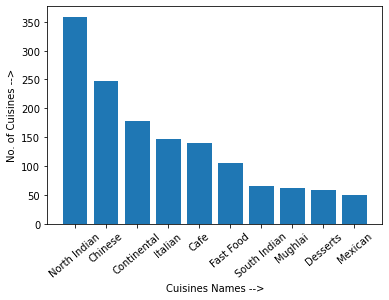

In [4]:
import pandas as pd  #Importing required libraries
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]# Making country as India acc to question
data=data.loc[data.Cuisines.notnull()]
# Distinguishing cities into Delhi-NCR (acc to ques) and Rest of India
def fun(s):
    if s=='New Delhi' or s=='Gaziabad' or s=='Noida' or s=='Faridabad' or s=='Gurgaon':
        s='Delhi-NCR'
        return s
    else:
        s='Rest Of India'
        return s

data['City']=data['City'].apply(fun)
#Making list of cuisines in Delhi-NCR
ncr_cuisines=list(data[data.City=='Delhi-NCR']['Cuisines']) 
# Taking and counting number of each cuisines through dictionary
NCR_Cuisines={}
for ele in ncr_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for i in li:
        if i in NCR_Cuisines:
            NCR_Cuisines[i]+=1
        else:
            NCR_Cuisines[i]=1

NCR_Cuisines=dict(sorted(NCR_Cuisines.items(),key=lambda kv :(kv[1],kv[0]),reverse=True)) #Sorting dictionary in descendng order
key_list=list(NCR_Cuisines.keys())[0:10] # Taking top 10 cuisines
val_list=list(NCR_Cuisines.values())[0:10]  
print('Top 10 Cuisines of Delhi-NCR-')
i=0
for key,val in NCR_Cuisines.items():
    if i==10:
        break
    print(key,val)
    i+=1
plt.bar(key_list,val_list)
plt.xlabel("Cuisines Names -->")
plt.ylabel("No. of Cuisines -->")
plt.xticks(rotation=40)
plt.show()
#Similarly making list of cuisines present in Rest of India
# Following the same process as above
rest_cuisines=list(data[data.City=='Rest Of India']['Cuisines'])
Rest_Cuisines={}
for ele in rest_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for i in li:
        if i in Rest_Cuisines:
            Rest_Cuisines[i]+=1
        else:
            Rest_Cuisines[i]=1
Rest_Cuisines=dict(sorted(Rest_Cuisines.items(),key=lambda kv :(kv[1],kv[0]),reverse=True))
key_list=list(Rest_Cuisines.keys())[0:10]
val_list=list(Rest_Cuisines.values())[0:10]
print('Top 10 Cuisines of Rest Of India-')
i=0
for key,val in Rest_Cuisines.items():
    if i==10:
        break
    print(key,val)
    i+=1
plt.bar(key_list,val_list)
plt.xlabel("Cuisines Names -->")
plt.ylabel("No. of Cuisines -->")
plt.xticks(rotation=40)
plt.show()
                

## 1.4

Total number of  cuisines in Delhi-NCR are-
15960
Total number of  cuisines in Rest of India are-
1894


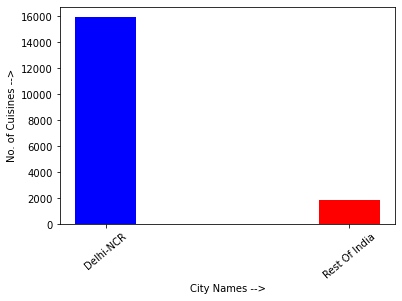

In [5]:
import pandas as pd #Importing the required libraries
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
data=data.loc[data.Cuisines.notnull()] # Removing the null values in Cuisines column
def fun(s):
    if s=='New Delhi' or s=='Gaziabad' or s=='Noida' or s=='Faridabad' or s=='Gurgaon':
        s='Delhi-NCR'
        return s
    else:
        s='Rest Of India'
        return s

data['City']=data['City'].apply(fun)
# Making list of cuisines in NCR region
ncr_cuisines=list(data[data.City=='Delhi-NCR']['Cuisines'])
# Calculating the number of cuisines present through list
NCR_Cuisines=[]
for ele in ncr_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for i in li:
         NCR_Cuisines.append(i) 
print('Total number of  cuisines in Delhi-NCR are-')
print(len(NCR_Cuisines))
# Making list of cuisines in Rest of India region
rest_cuisines=list(data[data.City=='Rest Of India']['Cuisines'])
# Calculating the number of cuisines present through list
Rest_Cuisines=[]
for ele in rest_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for i in li:
        Rest_Cuisines.append(i)
print('Total number of  cuisines in Rest of India are-')
print(len(Rest_Cuisines))
x=['Delhi-NCR','Rest Of India']
y=[len(NCR_Cuisines),len(Rest_Cuisines)]
plt.bar(x,y,color=['blue','red'],width=[.25,.25])
plt.xlabel("City Names -->")
plt.ylabel("No. of Cuisines -->")
plt.xticks(rotation=40)
plt.show()

## Question-2 
## Part 1

## 2.1.1

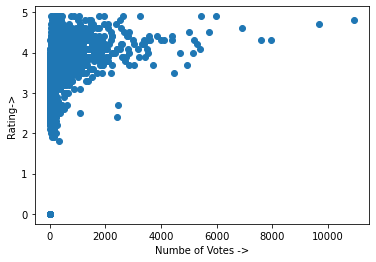

In [6]:
import pandas as pd # Importing the required libraries
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1] # Taking country as India acc to ques
data['Aggregate rating'].fillna(0,inplace=True) # Relacing null values with 0 in Aggregate rating column
data['Votes'].fillna(0,inplace=True) # Relacing null values with 0 in Votes column
x=list(data['Votes'])
y=list(data['Aggregate rating'])
# Plotting the graph
plt.ylabel('Rating->')
plt.xlabel('Numbe of Votes ->')
plt.scatter(x,y)
plt.show()

## 2.1.2

Restaurants serving n number of cuisines:
3 2397
2 2338
1 1395
4 1302
5 649
6 355
7 121
8 39
9 18
10 12
11 18
12 8


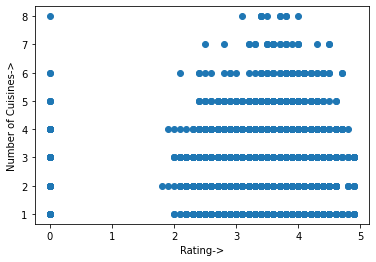

In [7]:
import pandas as pd # Importing the required libraries
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
data=data.loc[data.Cuisines.notnull()]
# Calculating the number of cuisines served by each Restaurant 
count=[]
for i in data.Cuisines:
    count.append(len(i.split()))
#Calculating the number restaurants serving n number o cuisines through dictionary
d={}
for i in count:
    if i in d:
        d[i]+=1
    else:
        d[i]=1        
print('Restaurants serving n number of cuisines:')
for key,val in d.items():
    print(key,val)
# Ploting graph between Rating and number of cuisiens served by the restaurants
rating=[i for i in data['Aggregate rating']]
cuisines=[len(i.split(',')) for i in data.Cuisines]
plt.ylabel('Number of Cuisines->')
plt.xlabel('Rating->')
plt.scatter(rating,cuisines)

## 2.1.3

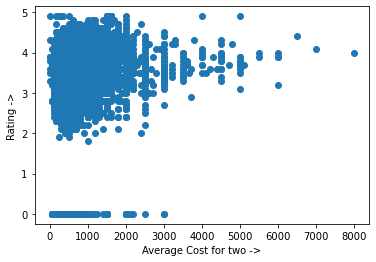

In [8]:
import pandas as pd # Importing the required libraries
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
data['Aggregate rating'].fillna(0,inplace=True)
data['Average Cost for two'].fillna(0,inplace=True)
x=list(data['Average Cost for two']) # Taking data for x-axis through list from column 'Average Cost for two'
y=list(data['Aggregate rating']) # Taking data for y-axis through list from column 'Aggregate rating'
# Plotting graph of rating vs average cost for two 
plt.ylabel('Rating ->')
plt.xlabel('Average Cost for two ->')
plt.scatter(x,y)
plt.show()

## 2.1.4

North Indian 2.5051697921946277
Chinese 2.598065476190476
Fast Food 2.5497198166072343
Mughlai 2.608072653884967
Bakery 2.396137931034482


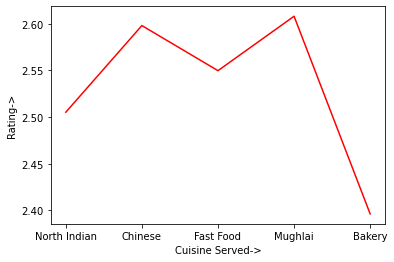

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
d={}
for ele in data['Cuisines']:
    li=[x.strip() for x in ele.split(',')]
    for i in li:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
d=dict(sorted(d.items(),key=lambda kv:(kv[1],kv[0]),reverse=True))            
cuisines=[]
i=0
for ele in d:
    if i==5:
        break
    cuisines.append(ele)    
    i+=1
l=list(zip(data['Cuisines'],data['Aggregate rating']))
rating={}
for i in cuisines:
    s=0
    count=0
    for j in range(len(l)):
        if i in l[j][0]:
            s+=l[j][1]
            count+=1
    rating[i]=(s/count) 
x=[]
y=[]
for i in rating:
    x.append(i)
    y.append(rating[i])
    print(i,rating[i])
plt.xlabel("Cuisine Served->") 
plt.ylabel("Rating->")
plt.plot(x,y,color='red')  
plt.show()

## Question 2
## Part2

## 2.2.1

Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Express Avenue Mall,  Royapettah 4.8
Deccan Gymkhana 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7


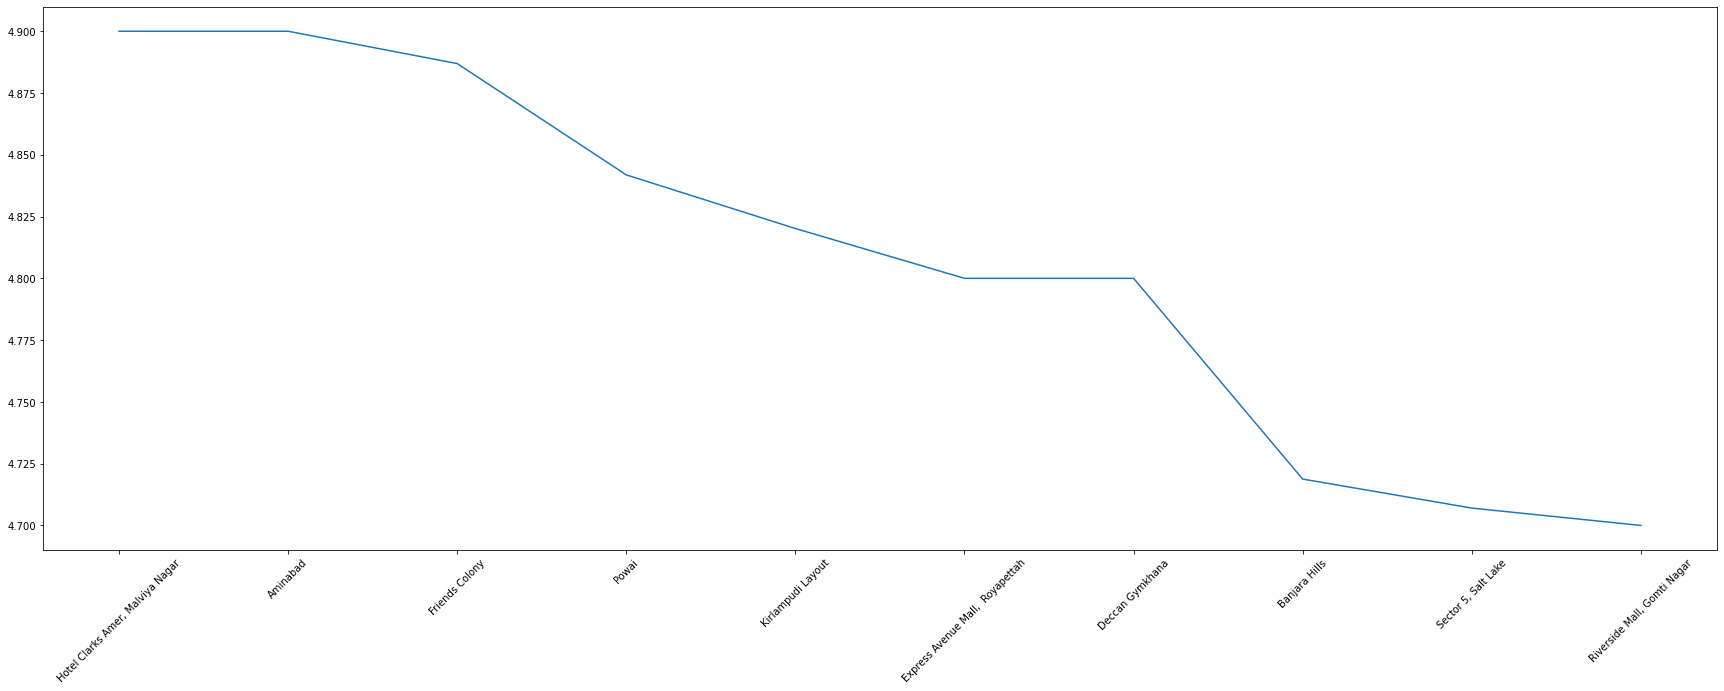

In [10]:
import pandas as pd #Importing the required lib 
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
data['weighted_average']=data['Votes']*data['Aggregate rating'] # Making a new column in which weighted rating are calculated
l=list(zip(data['Locality'],data['weighted_average']))  # Zipping the weighted and locality column together
d={}  
ind=[ele[0] for ele in l] # iTerating through diffeerent localities to calculate the total votes of a particular locality
for val in ind:
    key=data[data['Locality']==val]['weighted_average'].sum()
    v=data[data['Locality']==val]['Votes'].sum() # Summation of votes of a particular locality
    if v==0:
        continue
    d[val]=(key/v)   # Dividing the weihted rating by the total votes of that parti locality to get the exact rating
d=dict(sorted(d.items(),key= lambda kv:(kv[1],kv[0]),reverse=True))
x=[]
y=[]
i=0
# Taking top 10 localities with highest weighted rating
for key in d:
    if i==10:
        break
    x.append(key)
    y.append(d[key])
    print(key,d[key])
    i+=1 
# plotting the graph 
plt.subplots(figsize=(30,10))
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

## Question 3

## 3.1

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Giani               29
Pizza Hut           29
Baskin Robbins      28
Barbeque Nation     25
Dunkin' Donuts      22
Giani's             22
Barista             22
Costa Coffee        20
Pind Balluchi       20
Name: Restaurant Name, dtype: int64


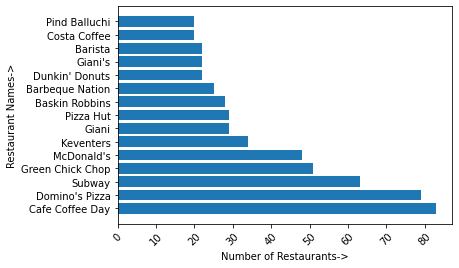

In [11]:
import pandas as pd #Importing the required lib
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
restaurants=data['Restaurant Name'].value_counts()[0:15] # Calculating the number of each restaurants
print(restaurants)
x=list(restaurants.index) # Restaurants  Name
y=list(restaurants.values) # Restaurant Number
# Plotting bar graph horizontally
plt.barh(x,y)
plt.xlabel('Number of Restaurants->')
plt.ylabel('Restaurant Names->')
plt.xticks(rotation=45)
plt.show()

## 3.2

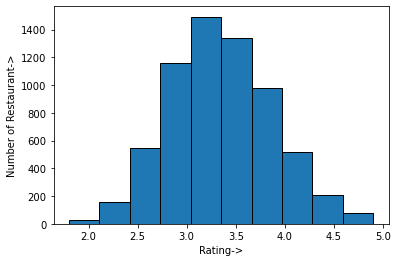

In [12]:
import pandas as pd #Imprting the required lb
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
data=data[data['Aggregate rating']!=0] # Including only rating that are not 0
x=data['Aggregate rating'] # Takin all the ratings and plotting a histogram 
rating=list(x)
plt.xlabel('Rating->')
plt.ylabel('Number of Restaurant->')
plt.hist(x,edgecolor='black')
plt.show()

## 3.3

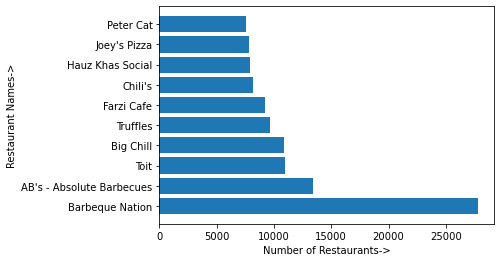

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
# Calculating the total number of votes of each restauratns
votes=data.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)[0:10] 
x=votes.index
y=votes.values
# Plotting the required graph
plt.xlabel('Number of Restaurants->')
plt.ylabel('Restaurant Names->')
plt.barh(x,y)
plt.xticks(rotation=0)
plt.show()

## 3.4

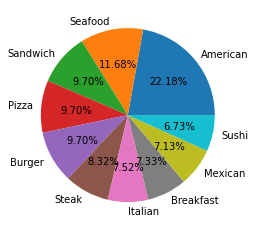

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==216] # Taking country as USA
data=data.loc[data.Cuisines.notnull()] # Removing all the null values in Cuisine column
d={}
for ele in data.Cuisines: 
    li=[x.strip() for x in ele.split(',')] # Splitting the cuisines and taking the count of each cuisine using dictionary
    for i in li:
        if i in d:
            d[i]+=1
        else:
            d[i]=1
cuisines=dict(sorted(d.items(),key=lambda kv :(kv[1],kv[0]),reverse=True))  # Sorting the dictionary in desc. order
# Taking top-10 values 
y=list(cuisines.values())[0:10] 
x=list(cuisines.keys())[0:10]
# potting a pir graph
plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

## 3.5

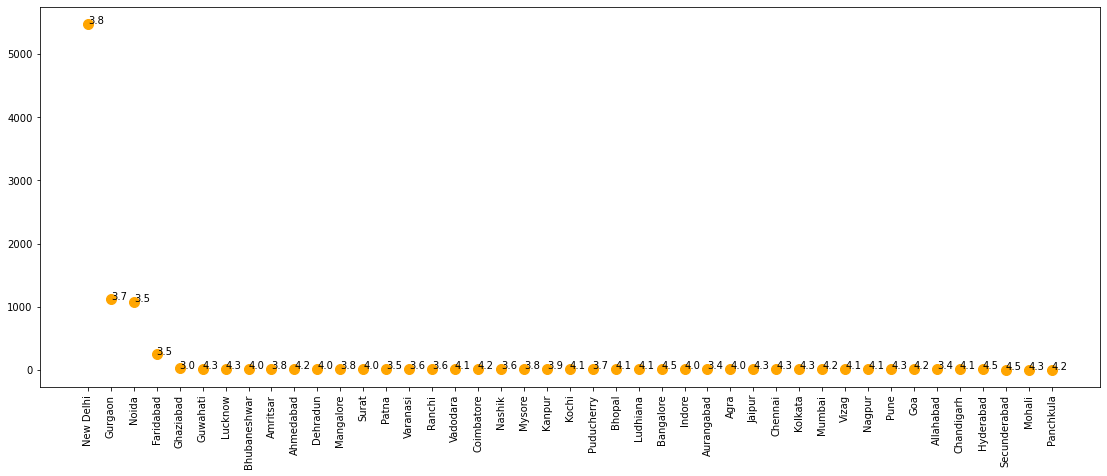

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("zomato.csv",encoding='ISO-8859-1')
data=data[data['Country Code']==1]
data['weighted']=data['Votes']*data['Aggregate rating'] # Calculating the weighted rating
li=data['City'].value_counts()
x=list(li.index)
y=list(li.values)
z=[]
d={}
for ele in x:
    a=data[data['City']==ele]['weighted'].sum()
    b=data[data['City']==ele]['Votes'].sum()
    val=(a/b)
    z.append(val)
    d[ele]=d.get(ele,val)+val
for ele in d:
    d[ele]=round(d[ele],1)
plt.subplots(figsize=(19,7))
plt.scatter(x,y,s=100,color='orange')
plt.xticks(rotation=90)
for i in range(len(x)):
    plt.text(x[i],y[i],round(z[i],1))
plt.show()